# Invoice Classification - Data Exploration
Erste Analyse und Aufbereitung der Rechnungsdaten

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## 1. Daten laden

In [9]:
# Pfade anpassen falls nötig
train_df = pd.read_csv('../Data/Dataset/Train.csv')
test_df = pd.read_csv('../Data/Dataset/Test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (5566, 6)
Test shape: (2446, 5)


## 2. Erste Übersicht

In [10]:
# Erste 5 Zeilen anschauen
train_df.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [11]:
# Datentypen und Null-Werte
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            5566 non-null   int64  
 1   Vendor_Code       5566 non-null   object 
 2   GL_Code           5566 non-null   object 
 3   Inv_Amt           5566 non-null   float64
 4   Item_Description  5566 non-null   object 
 5   Product_Category  5566 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 261.0+ KB


In [12]:
# Statistische Übersicht
train_df.describe()

,Inv_Id,Inv_Amt
count,5566.000000,5566.000000
mean,19010.787100,49.980151
std,2306.607485,28.903030
min,15001.000000,0.010000
25%,17006.250000,24.957500
50%,19017.500000,49.645000
75%,20994.750000,75.170000
max,23012.000000,99.990000


In [13]:
# Null-Werte prüfen
print("Null-Werte pro Spalte:")
print(train_df.isnull().sum())

Null-Werte pro Spalte:
Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64


## 3. Target-Variable analysieren (Product_Category)

In [14]:
# Anzahl der verschiedenen Kategorien
n_categories = train_df['Product_Category'].nunique()
print(f"Anzahl verschiedener Product Categories: {n_categories}")

# Top 10 häufigste Kategorien
print("\nTop 10 häufigste Kategorien:")
print(train_df['Product_Category'].value_counts().head(10))

Anzahl verschiedener Product Categories: 36

Top 10 häufigste Kategorien:
Product_Category
CLASS-1758    1498
CLASS-1274     986
CLASS-1522     851
CLASS-1250     451
CLASS-1376     365
CLASS-1963     230
CLASS-1249     176
CLASS-1828     113
CLASS-2141     108
CLASS-1721     107
Name: count, dtype: int64


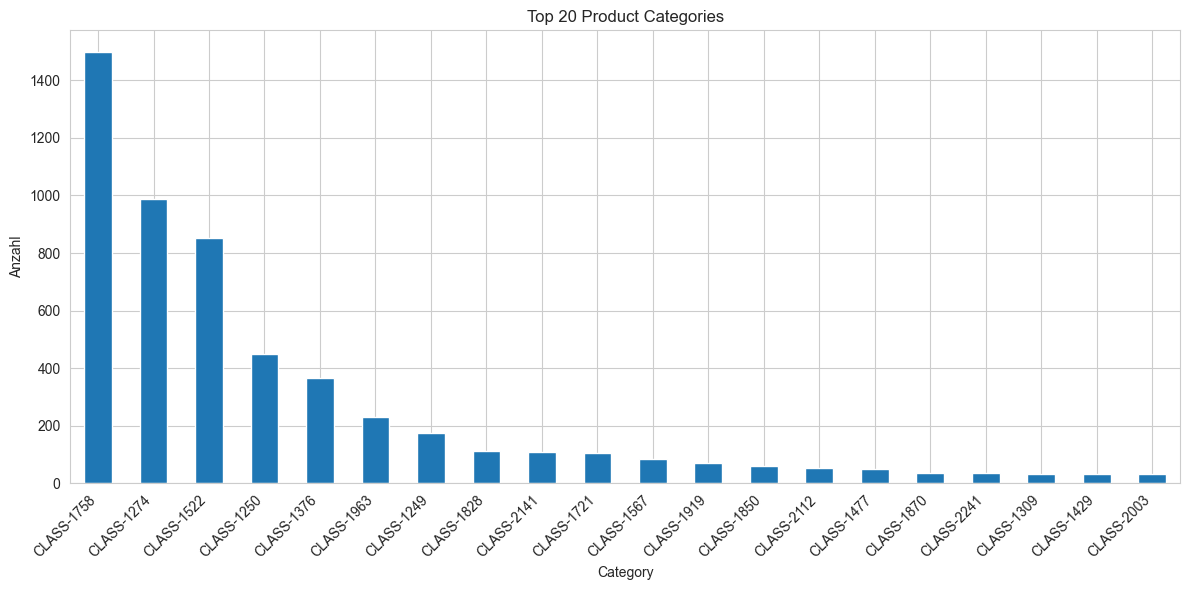

In [15]:
# Verteilung der Top 20 Kategorien visualisieren
plt.figure(figsize=(12, 6))
train_df['Product_Category'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Feature-Analyse

In [16]:
# Vendor_Code
print(f"Anzahl verschiedener Vendors: {train_df['Vendor_Code'].nunique()}")
print(f"Top 5 Vendors:")
print(train_df['Vendor_Code'].value_counts().head())

Anzahl verschiedener Vendors: 1253
Top 5 Vendors:
Vendor_Code
VENDOR-1883    330
VENDOR-1513    253
VENDOR-1944    179
VENDOR-1551    175
VENDOR-2513    170
Name: count, dtype: int64


In [17]:
# GL_Code
print(f"Anzahl verschiedener GL Codes: {train_df['GL_Code'].nunique()}")
print(f"Top 5 GL Codes:")
print(train_df['GL_Code'].value_counts().head())

Anzahl verschiedener GL Codes: 9
Top 5 GL Codes:
GL_Code
GL-6050310    1618
GL-2182000    1297
GL-6050100     962
GL-6101400     802
GL-6100410     388
Name: count, dtype: int64


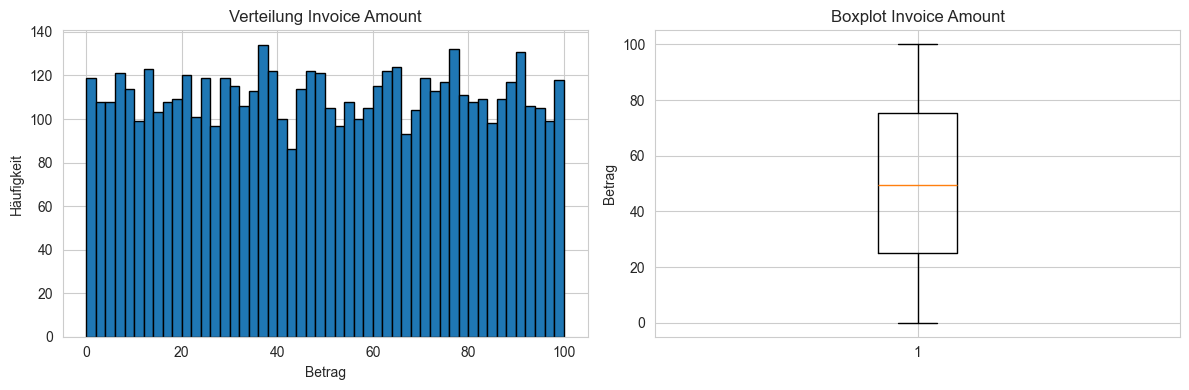


Inv_Amt Statistiken:
count    5566.000000
mean       49.980151
std        28.903030
min         0.010000
25%        24.957500
50%        49.645000
75%        75.170000
max        99.990000
Name: Inv_Amt, dtype: float64


In [18]:
# Invoice Amount
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(train_df['Inv_Amt'], bins=50, edgecolor='black')
plt.title('Verteilung Invoice Amount')
plt.xlabel('Betrag')
plt.ylabel('Häufigkeit')

plt.subplot(1, 2, 2)
plt.boxplot(train_df['Inv_Amt'])
plt.title('Boxplot Invoice Amount')
plt.ylabel('Betrag')

plt.tight_layout()
plt.show()

print(f"\nInv_Amt Statistiken:")
print(train_df['Inv_Amt'].describe())

## 5. Text-Analyse (Item_Description)

In [19]:
# Textlängen analysieren
train_df['description_length'] = train_df['Item_Description'].str.len()
train_df['description_word_count'] = train_df['Item_Description'].str.split().str.len()

print("Textlängen-Statistiken:")
print(train_df['description_length'].describe())

print("\nWort-Anzahl-Statistiken:")
print(train_df['description_word_count'].describe())

Textlängen-Statistiken:
count    5566.000000
mean      119.400647
std        30.393912
min        64.000000
25%        98.000000
50%       113.000000
75%       146.000000
max       194.000000
Name: description_length, dtype: float64

Wort-Anzahl-Statistiken:
count    5566.000000
mean       15.474488
std         3.302314
min         7.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        25.000000
Name: description_word_count, dtype: float64


In [20]:
# Beispiele anschauen
print("Beispiel-Beschreibungen aus verschiedenen Kategorien:\n")
for category in train_df['Product_Category'].value_counts().head(3).index:
    print(f"\n=== {category} ===")
    examples = train_df[train_df['Product_Category'] == category]['Item_Description'].head(2)
    for i, desc in enumerate(examples, 1):
        print(f"{i}. {desc}")

Beispiel-Beschreibungen aus verschiedenen Kategorien:


=== CLASS-1758 ===
1. Travel and Entertainment Miscellaneous Company Car (Field Only) Texas New Mexico Power Co Ground Transportation Miscellaneous Company Car (Field Only) 2011-Mar 
2. Ground Transportation Travel and Entertainment Miscellaneous Company Car (Field Only) Miscellaneous Company Car (Field Only) 2003May Fortune National Corp

=== CLASS-1274 ===
1. Store Management Lease/Rent Deltona Corp Real Estate Base Rent Jul2018
2. Base Rent Store Management Chicago Rivet & Machine Co Dec-2017 Lease/Rent Real Estate

=== CLASS-1522 ===
1. Store Construction General Requirements Colonial Trust Iii General Contractor Final Site Clean Up 2005-Dec 
2. Final Site Clean Up 2018Mar Store Construction Dravo Corp General Contractor General Requirements


## 6. Häufigste Wörter

In [21]:
from collections import Counter
import re

# Text zusammenfügen und aufbereiten
all_text = ' '.join(train_df['Item_Description'].astype(str).str.lower())
# Nur Buchstaben und Leerzeichen behalten
all_text = re.sub(r'[^a-z\s]', ' ', all_text)
words = all_text.split()

# Top 30 häufigste Wörter
word_counts = Counter(words)
top_words = word_counts.most_common(30)

print("Top 30 häufigste Wörter:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 30 häufigste Wörter:
miscellaneous: 3036
company: 3013
car: 2996
field: 2996
only: 2996
and: 2758
inc: 2132
services: 2011
rent: 1975
store: 1872
general: 1753
corporate: 1728
transportation: 1619
entertainment: 1499
travel: 1498
ground: 1498
corp: 1468
labor: 1460
auto: 1257
co: 1102
leasing: 1078
real: 1055
estate: 1055
management: 1023
lease: 987
base: 987
construction: 904
smap: 899
requirements: 851
contractor: 851


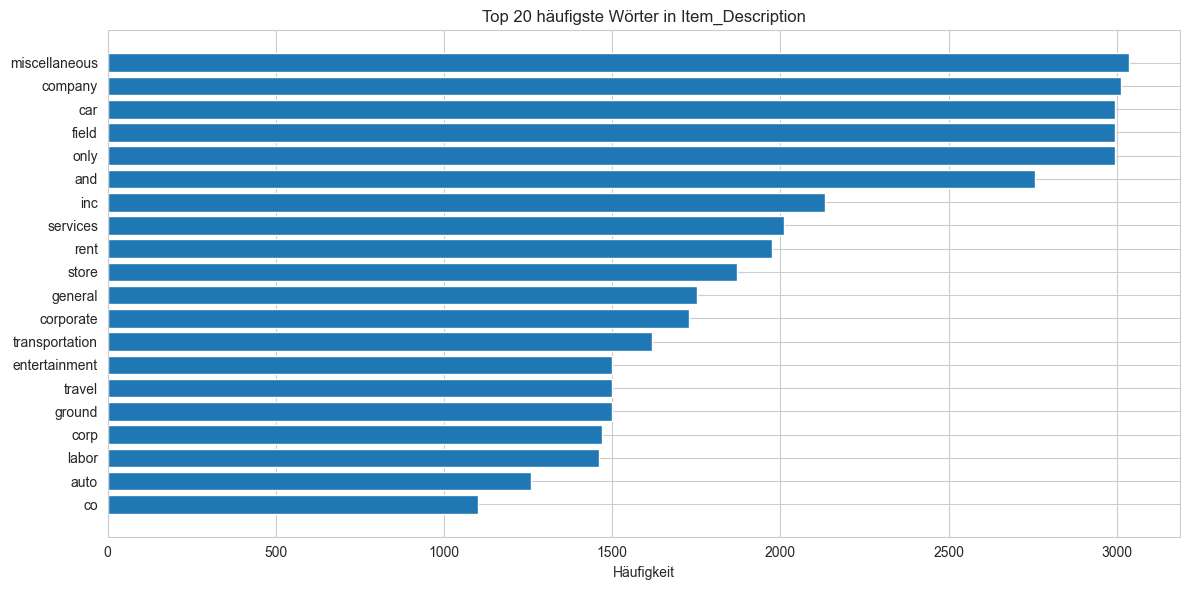

In [22]:
# Visualisierung der Top 20 Wörter
words_df = pd.DataFrame(top_words[:20], columns=['Wort', 'Anzahl'])

plt.figure(figsize=(12, 6))
plt.barh(words_df['Wort'], words_df['Anzahl'])
plt.xlabel('Häufigkeit')
plt.title('Top 20 häufigste Wörter in Item_Description')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 7. Zusammenfassung & Nächste Schritte

**Erkenntnisse:**
- TODO: Nach Ausführung ausfüllen

**Nächste Schritte:**
1. Text-Cleaning Funktion schreiben
2. Features vorbereiten (TF-IDF, Encoding)
3. Baseline Model trainieren

In [24]:
# Kategorisierte Daten speichern
output_df = train_df[['Inv_Id', 'Vendor_Code', 'GL_Code', 'Inv_Amt', 'Item_Description', 'General_Category', 'Product_Category']]
output_df.to_csv('../Data/Dataset/Train_categorized.csv', index=False)
print("✓ Kategorisierte Daten gespeichert: Train_categorized.csv")
print(f"Anzahl Zeilen: {len(output_df)}")
print(f"Anzahl Kategorien: {output_df['General_Category'].nunique()}")

KeyError: "['General_Category'] not in index"

In [ ]:
# Beispiele pro Kategorie anzeigen
print("=== Beispiele pro Kategorie ===\n")
for category in train_df['General_Category'].value_counts().index:
    print(f"\n### {category} ###")
    examples = train_df[train_df['General_Category'] == category]['Item_Description'].head(3)
    for i, desc in enumerate(examples, 1):
        print(f"{i}. {desc[:100]}...")
    print(f"Anzahl: {len(train_df[train_df['General_Category'] == category])}")

In [ ]:
# Visualisierung der allgemeinen Kategorien
plt.figure(figsize=(12, 6))
category_counts = train_df['General_Category'].value_counts()
plt.bar(range(len(category_counts)), category_counts.values)
plt.xticks(range(len(category_counts)), category_counts.index, rotation=45, ha='right')
plt.title('Verteilung der allgemeinen Kategorien')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.tight_layout()
plt.show()

In [ ]:
# Kategorie-Mapping basierend auf Keywords
def classify_general_category(description):
    """
    Klassifiziert eine Item_Description in allgemeine Kategorien
    """
    desc_lower = description.lower()
    
    # Transport & Fahrzeuge
    if any(word in desc_lower for word in ['auto', 'leasing', 'car', 'vehicle', 'transportation', 'ground transportation']):
        return 'Transport/Fahrzeuge'
    
    # Immobilien & Miete
    elif any(word in desc_lower for word in ['lease', 'rent', 'real estate', 'base rent', 'store management']):
        return 'Immobilien/Miete'
    
    # Bau & Handwerk
    elif any(word in desc_lower for word in ['construction', 'contractor', 'site clean', 'building']):
        return 'Bau/Handwerk'
    
    # Personal & HR
    elif any(word in desc_lower for word in ['labor', 'contingent', 'human resources', 'employee', 'staffing']):
        return 'Personal/HR'
    
    # Reisen & Bewirtung
    elif any(word in desc_lower for word in ['travel', 'entertainment', 'hotel', 'flight', 'meal']):
        return 'Reisen/Bewirtung'
    
    # Marketing & Design
    elif any(word in desc_lower for word in ['artworking', 'typesetting', 'production', 'packaging design', 'smap', 'prototype']):
        return 'Marketing/Design'
    
    # Events & Promotion
    elif any(word in desc_lower for word in ['event', 'promotion', 'trade show', 'talent', 'artists']):
        return 'Events/Promotion'
    
    # Sonstige Services
    elif 'services' in desc_lower or 'corporate services' in desc_lower:
        return 'Sonstige Dienstleistungen'
    
    # Nicht klassifiziert
    else:
        return 'Sonstiges'

# Kategorien hinzufügen
train_df['General_Category'] = train_df['Item_Description'].apply(classify_general_category)

print("Verteilung der allgemeinen Kategorien:")
print(train_df['General_Category'].value_counts())
print(f"\nAnzahl verschiedener Kategorien: {train_df['General_Category'].nunique()}")

## 8. Kategorisierung in allgemeine Kategorien

Mapping der Item_Description in allgemeine Kategorien wie:
- Transport/Fahrzeuge
- Immobilien/Miete  
- Bau/Handwerk
- Personal/HR
- Reisen/Bewirtung
- Marketing/Design
- etc.